# Importações

In [290]:
# GERAL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import math

In [2]:
# MODELAGEM
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# SCALING
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
# MODELOS -  SUPERVISIONADO

# REGRESSÃO
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# CLASSIFICAÇÃO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Ensembles
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm

In [4]:
# MODELOS - NÃO SUPERVISIONADO

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# HDBSCAN
# import hdbscan

In [5]:
# MÉTRICAS

# CLASSIFICAÇÃO
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error as MSE

# REGRESSÃO
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix,plot_roc_curve

# OUTROS
from sklearn.metrics import make_scorer

In [6]:
# DATASETS
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

In [7]:
# DATASETS -  NÃO SUPERVISIONADO
from sklearn.datasets import make_moons

In [8]:
# EXEMPLO USANDO DATASET DO SKLEARN
load_df = load_breast_cancer()
dataset = pd.concat([pd.DataFrame(load_df.data,columns = load_df.feature_names)
                     ,pd.DataFrame(load_df.target,columns = ['target'])], axis=1)

In [293]:

# EXEMPLO USANDO DATASET CARREGADO
# Salva e carrega a base
# dataset.to_csv(r'..\Data\Churn_Modelling.csv')
# dataset = pd.read_csv(r'..\Data\Churn_Modelling.csv')
# dataset = pd.read_csv(r'..\Data\Social_Network_Ads.csv')
dataset = pd.read_csv(r'..\Data\Titanic.csv')

# Exploratório Dataset

In [294]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Fox, Mr. Stanley Hubert",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [296]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [297]:
def dataframe_description(df):
    
    isna = df.isna().sum(axis=0).to_frame()
    isna.columns = ['Total de Missing']
    isna['% de Missing'] = round(100*isna['Total de Missing']/df.shape[0],2)

    dtypes = df.dtypes.to_frame()
    dtypes.columns = ['Tipo']

    descriptions = df.describe(include='all').T    
    
    resume = pd.merge(dtypes, isna, left_index=True, right_index=True)
    resume = resume.merge(descriptions, right_index=True, left_index=True)
        
    return resume

dataframe_description(dataset)

,Tipo,Total de Missing,% de Missing,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,int64,0,0.00,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,int64,0,0.00,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,int64,0,0.00,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,object,0,0.00,891,891,"Fox, Mr. Stanley Hubert",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,object,0,0.00,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,float64,177,19.87,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,int64,0,0.00,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,int64,0,0.00,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,object,0,0.00,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,float64,0,0.00,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [298]:
# Dataprep usando Regex
dataset['title'] = dataset.Name.apply(lambda x: re.compile('[,](.*)[.]').findall(x)[0])
main_titles = dataset['title'].value_counts()[dataset['title'].value_counts()>5].index.values
dataset['title'] = dataset.title.apply(lambda x: x if x in main_titles else 'Other')
dataset['title'].value_counts()

 Mr        517
 Miss      182
 Mrs       124
 Master     40
Other       15
 Dr          7
 Rev         6
Name: title, dtype: int64

In [299]:
# dropa colunas não informativas

print('dataset shape antes de droppar:{}'.format(dataset.shape))
print('colunas:{}\n'.format(dataset.columns.values))

# drop_columns = ['RowNumber','CustomerId','Surname']
drop_columns = ['PassengerId', 'Name','Ticket','Cabin']

dataset.drop(columns=drop_columns, inplace=True)

print('dataset shape após de droppar:{}'.format(dataset.shape))
print('colunas:{}\n'.format(dataset.columns.values))

dataset shape antes de droppar:(891, 13)
colunas:['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'title']

dataset shape após de droppar:(891, 9)
colunas:['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'title']



In [300]:
# target_name= 'target'
target_name= 'Survived'

X = dataset.drop(columns=target_name)
y = dataset[target_name]

In [301]:
numerical = X.select_dtypes(include=np.number).columns.to_list()
categorical = X.select_dtypes(include='object').columns.to_list()

print('Total de colunas identificadas:',len(numerical + categorical))
print('Total de colunas em X:', len(X.columns))
print('Colunas numericas:{}'.format(numerical))
print('Colunas categoricas:{}'.format(categorical))

Total de colunas identificadas: 8
Total de colunas em X: 8
Colunas numericas:['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Colunas categoricas:['Sex', 'Embarked', 'title']


In [302]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


# Separação Treino e Teste

In [303]:
X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   shuffle=False,
                                                   random_state=42)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(712, 8)
y_train shape:(712,)
X_test shape:(179, 8)
y_test shape:(179,)


# Imputers

In [304]:
# numerical_means = X_train[numerical].mean().to_dict() 
# categorical_modes = X_train[categorical].mode().iloc[0,:].to_dict()

In [305]:
# def merge_dicts(*dict_args):
#     """
#     Given any number of dictionaries, shallow copy and merge into a new dict,
#     precedence goes to key-value pairs in latter dictionaries.
#     """
#     result = {}
#     for dictionary in dict_args:
#         result.update(dictionary)
#     return result

# fill_values =merge_dicts(numerical_means, categorical_modes)

In [306]:

def fillna_dataframe(X_train, X_test):

    ordered_columns = X_train.columns
    
    train_means = X_train[numerical].mean().to_dict()
    train_modes = X_test[categorical].mode().iloc[0,:].to_dict()
    
    # Média para continuas e moda para categoricas
    train = pd.concat([X_train.loc[:,numerical].fillna(train_means), 
               X_train.loc[:,categorical].fillna(train_modes)],axis=1)

    test = pd.concat([X_test.loc[:,numerical].fillna(train_means),
                      X_test.loc[:,categorical].fillna(train_modes)], axis=1)
    
    return train[ordered_columns],test[ordered_columns]

In [307]:
X_train, X_test = fillna_dataframe(X_train, X_test)

In [308]:
dataframe_description(X_train)

,Tipo,Total de Missing,% de Missing,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pclass,int64,0,0.0,712.0,NaN,NaN,NaN,2.301966,0.838656,1.0,2.0,3.0,3.0,3.0
Sex,object,0,0.0,712,2,male,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,float64,0,0.0,712.0,NaN,NaN,NaN,30.030531,13.005767,0.75,22.0,30.030531,36.0,80.0
SibSp,int64,0,0.0,712.0,NaN,NaN,NaN,0.52809,1.064342,0.0,0.0,0.0,1.0,8.0
Parch,int64,0,0.0,712.0,NaN,NaN,NaN,0.382022,0.813122,0.0,0.0,0.0,0.0,6.0
Fare,float64,0,0.0,712.0,NaN,NaN,NaN,32.509538,48.67271,0.0,7.925,15.0229,31.275,512.3292
Embarked,object,0,0.0,712,3,S,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,object,0,0.0,712,7,Mr,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
dataframe_description(X_test)

,Tipo,Total de Missing,% de Missing,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pclass,int64,0,0.0,179.0,NaN,NaN,NaN,2.335196,0.827506,1.0,2.0,3.0,3.0,3.0
Sex,object,0,0.0,179,2,male,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,float64,0,0.0,179.0,NaN,NaN,NaN,28.708581,12.972878,0.42,21.0,30.030531,33.5,74.0
SibSp,int64,0,0.0,179.0,NaN,NaN,NaN,0.502793,1.246903,0.0,0.0,0.0,1.0,8.0
Parch,int64,0,0.0,179.0,NaN,NaN,NaN,0.379888,0.77954,0.0,0.0,0.0,0.0,5.0
Fare,float64,0,0.0,179.0,NaN,NaN,NaN,30.98971,53.688977,0.0,7.8958,13.0,30.0,512.3292
Embarked,object,0,0.0,179,3,S,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,object,0,0.0,179,7,Mr,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Remove os NA de treino e Teste

# X_train.dropna(inplace=True)
# y_train = y_train[y_train.index.isin(X_train.index)]
# X_test.dropna(inplace=True)
# y_test = y_test[y_test.index.isin(X_test.index)]

# print('X_train shape:{}'.format(X_train.shape))
# print('y_train shape:{}'.format(y_train.shape))
# print('X_test shape:{}'.format(X_test.shape))
# print('y_test shape:{}'.format(y_test.shape))

In [ ]:
# # Imputers

# def fill_values(df, colunas, fill='mean'):
    
#     df_filled = df.copy()
    
#     if fill =='mean':
#         df_filled[colunas] = df_filled[colunas].fillna(df_filled[colunas].mean())
        
#     if fill =='median':
#         df_filled[colunas] = df_filled[colunas].fillna(df_filled[colunas].median()) 
        
#     else:
#         df_filled[colunas] = df_filled[colunas].fillna(fill)
        
#     return df_filled
    


# Encodings

In [310]:
# Encondings

X_train = pd.get_dummies(X_train,columns=categorical,drop_first=False)
X_test = pd.get_dummies(X_test,columns=categorical,drop_first=False)

print('X_train shape:{}'.format(X_train.shape))
print('X_test shape:{}'.format(X_test.shape))

# Crio colunas zeradas casa exista alguma categoria não present no teste
for coluna in X_train.columns:
    if coluna not in X_test.columns:
        X_test[coluna]=0
        
# Drop first
for coluna in categorical:
    X_train.drop(columns = X_train.filter(like=coluna).columns[0])
    X_test.drop(columns = X_train.filter(like=coluna).columns[0])

X_train shape:(712, 17)
X_test shape:(179, 17)


# Scaler / Normalizer

In [311]:
# # Feature Scaling

# min max
# scaler= MinMaxScaler()

# normalizer
# scaler =StandardScaler()

# # Scaler
# X_train_scaled=scaler.fit_transform(X_train[numerical])
# X_test_scaled=scaler.transform(X_test[numerical])

# X_train = pd.concat([X_train.drop(columns=numerical), pd.DataFrame(X_train_scaled,columns= numerical)], axis=1)
# X_test = pd.concat([X_test.drop(columns=numerical), pd.DataFrame(X_test_scaled,columns= numerical)], axis=1)

# # Descrição do dataframe
# X_train.describe().T

In [312]:
# # scaler coluna por coluna

# scaler=MinMaxScaler()
scaler=StandardScaler()

valores_scaling={}

for coluna in numerical:
    X_train[coluna] = scaler.fit_transform(X_train[[coluna]]).ravel()
    X_test[coluna] = scaler.transform(X_test[[coluna]]).ravel()
    valores_scaling[coluna] = scaler


# Classifiers

In [154]:
# metricas gerais

def classification_metrics(y_true, y_pred, proba=True, threshold=0.5):

    metrics={}
    
    if proba == True:
        metrics['accuracy']=accuracy_score(y_true, y_pred > threshold)
        metrics['precision']=precision_score(y_true, y_pred > threshold)
        metrics['recall']=recall_score(y_true, y_pred > threshold) 
        metrics['f1']=f1_score(y_true, y_pred > threshold)
        metrics['log_loss'] = log_loss(y_true, y_pred > threshold)
        metrics['roc_auc']=roc_auc_score(y_true, y_pred)
    
    else:
        metrics['accuracy']=accuracy_score(y_true, y_pred > threshold)
        metrics['precision']=precision_score(y_true, y_pred > threshold)
        metrics['recall']=recall_score(y_true, y_pred > threshold) 
        metrics['f1']=f1_score(y_true, y_pred > threshold)
        metrics['log_loss'] = log_loss(y_true, y_pred > threshold)
        metrics['roc_auc']=np.nan
    
    return metrics

In [156]:
classifier= KNeighborsClassifier(n_neighbors=5)

# n_neighbors:int, default=5 == número de vizinhos
# weights (default=’uniform’)== peso utilizado na classificação podendo ser ‘uniform’ - mesmo peso, ‘distance’ - inverso da distância or callable= distância definida pelo usuário
# algorithm (default=’auto’) == algoritmo usado para computar vizinho mais próximos, podendo ser ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’,
# leaf_sizeint (default=30)== aplicavel quando se utiliza BallTree ou KDTree -  
# p (default=2 / euclidiana)== parametro da distância de Minkowski [int] / p = 1 - manhattan_distance (l1), p = 2 - euclidean_distance (l2) metricstr or callable, 
# metric (default=’minkowski’)== métrica utilizada na arvore
# metric_params (default=None)== parametro adiciona de metric [dict] 
# n_jobsint (default=None)== numero de jobs paralelos realizado na procura pelos vizinhos. Não afeta o fit

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.851124,0.852459,0.748201,0.796935,5.142049,0.928899
test,0.843575,0.790323,0.765625,0.777778,5.402772,0.880707


In [313]:
classifier= LogisticRegression(penalty='l2',C=0.1, max_iter=1e4)

# penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’ == tipo de regularização
# dual: bool, default=False == método de otimização (preferir dual =False se n_samples>n_features)
# tol: float, default=1e-4 == tolerancia (criterio de stop/convergencia)
# C: float, default=1.0 == parametro de regularização (inverso da regularização:1/lambda)
# fit_intercept: bool, default=True == específica se tenho o termo de intercepto (bias)
# intercept_scaling: float, default=1 **
# class_weight: dict or ‘balanced’, default=None == peso das classes
# random_state: int, RandomState instance, default=None
# solver:{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ == método de otimização
# max_iter:int, default=100 == número máximo de iterações até convergência
# multi_class:{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’ == como tratar a multiclass
# verbose:int, default=0 == verbose do fit
# warm_start:bool, default=False 
# n_jobs:int, default=None
# l1_ratio: float, default=None == se penalty é 'elasticnet' controla balance entre l1 e l2. se =0: penalty l2, se =1: l1

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Atributos do modelo
coefs_ = pd.DataFrame({'variavel':X_train.columns,'coef':classifier.coef_[0]}).set_index('variavel')
intercept = pd.DataFrame({'variavel': ['intercept'] , 'coef': classifier.intercept_}).set_index('variavel')
coefs_ = coefs_.append(intercept)

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.814607,0.785156,0.723022,0.752809,6.403318,0.863425
test,0.860335,0.819672,0.781250,0.800000,4.823901,0.903397


In [161]:
classifier= DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10)

# criterion: {“gini”, “entropy”}, default=”gini” == critério de split
# splitter: {“best”, “random”}, default=”best” == estratégia de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# random_state:int, RandomState instance or None, default=None
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer splitt
# class_weight:dict, list of dict or “balanced”, default=None == peso das classes
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning

classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# from sklearn import tree

# # Arvores - principais atributos
# print('profundidade:{}'.format(classifier.get_depth()))
# print('num. folhas:{}'.format(classifier.get_n_leaves()))
# print('parametros:{}'.format(classifier.get_params()))
# profundidade dado numero de registro : math.log(n,2)

# plt.figure(figsize=(20,15))
# tree.plot_tree(classifier,filled=True,feature_names=X_train.columns)
# plt.show()

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.839888,0.820312,0.755396,0.786517,5.530137,0.875315
test,0.854749,0.796875,0.796875,0.796875,5.016864,0.907065


In [164]:
# classifier=GaussianNB(var_smoothing=.02)
# classifier = MultinomialNB()
classifier = BernoulliNB(alpha=0.5)

### GAUSSIAN ###
# priors:array-like of shape (n_classes,) == as priors de cada classe. se não especificado é ajustado conforme os dados
# var_smoothing:float, default=1e-9 == porção da máxima variancia de todos os features que é adicionado  à variância para estabilidade

### MULTINOMIAL ###
# Contagens 
# alpha: float, default=1.0 == suavizador de Laplace
# binarize: float or None, default=0.0 == transforma em binários - threshold para acima de 0 como default
# class_prior: array-like of shape (n_classes,), default=None ==  priors de cada classe

### BERNOULLI ###
# Booleanas
# alpha: float, default=1.0 == suavizador de Laplace
# binarize: float or None, default=0.0 == transforma em binários - threshold para acima de 0 como default
# fit_prior: bool, default=True == verdadeiro ou falso / aprendizado da prior
# class_prior: array-like of shape (n_classes,), default=None ==  priors de cada classe

categorical = [coluna for coluna in X_train.columns if coluna not in numerical]
ref_cols = categorical
# ref_cols = numerical

# Fit do modelo
classifier.fit(X_train[ref_cols], y_train)
y_pred_train = classifier.predict(X_train[ref_cols])
y_pred_test = classifier.predict(X_test[ref_cols])

y_pred_proba_train = classifier.predict_proba(X_train[ref_cols])[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test[ref_cols])[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.785112,0.741313,0.690647,0.715084,7.422031,0.808002
test,0.798883,0.741379,0.671875,0.704918,6.946413,0.843071


In [166]:
classifier= SVC(C=1, random_state=42,probability=True)

# C:float, default=1.0 == parametro de regularização (inverso)
# kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ == tipo de kernel
# degree:int, default=3 == grau da função polinimonial do kernel
# gamma:{‘scale’, ‘auto’} or float, default=’scale’ == somente em 'rbf', 'poly' ou 'sigmoid'
# coef0:float, default=0.0 == termo independe do kernel - somente em 'poly' ou 'sigmoid'
# probability:bool, default=False == se verdadeiro, utiliza Platt scaling = que é aplicar uma regressão logística no score do svm
# tol:float, default=1e-3 == tolerancia (criterio de parada)
# class_weight:dict or ‘balanced’, default=None == peso das classes
# decision_function_shape:{‘ovo’, ‘ovr’}, default=’ovr’ == usado em multiclasse para estrategia ovo ou ovr
# break_ties:bool, default=False
# random_state:int, RandomState instance or None, default=None

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.830056,0.817814,0.726619,0.769524,5.869702,0.879049
test,0.877095,0.850000,0.796875,0.822581,4.245029,0.898913


In [227]:
classifier = RandomForestClassifier(n_estimators=100,
                                    max_depth=8,
                                    min_samples_leaf=8,
                                    class_weight={0:1, 1:2},
                                    random_state=42)

# n_estimators: int, default=100 == número de árvores
# criterion: {“gini”, “entropy”}, default=”gini” == critério de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer splitt
# random_state:int, RandomState instance or None, default=None
# bootstrap:bool, default=True == se usa técnica de boostrap
# oob_score: bool, default=False == score out of bag (daí pode obter os score oob pelo atributo oob_score_)
# class_weight:dict, list of dict or “balanced”, default=None == peso das classes
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning
# max_samples:int or float, default=None == se uso bootstrap, qual o tamanho do dataset criado por reposição. Se float pega o percentual

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T


,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.841292,0.781570,0.823741,0.802102,5.481647,0.905899
test,0.832402,0.736111,0.828125,0.779412,5.788707,0.911005


In [228]:
classifier= GradientBoostingClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_leaf=0.05,
                                       random_state=42
                                      )

# loss{‘deviance’, ‘exponential’}, default=’deviance’ == função de custo, expontential usa os odds - como em regressão logística
# learning_rate: float, default=0.1 == multiplicador do output de cada árvore
# n_estimators: int, default=100 == número de árvores
# subsample:float, default=1.0 == não são todos os registros que são usados nos fitt dos estimadores - aumenta viés
# criterion{‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’== critério de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer split
# init: estimator or ‘zero’, default=None == computa a predição original
# random_state:int, RandomState instance or None, default=None
# bootstrap:bool, default=True == se usa técnica de boostrap
# validation_fraction: float, default=0.1 ******
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning
# max_samples:int or float, default=None == se uso bootstrap, qual o tamanho do dataset criado por reposição. Se float pega o percentual

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T


,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.893258,0.904000,0.81295,0.856061,3.686750,0.949669
test,0.849162,0.793651,0.78125,0.787402,5.209818,0.904688


In [214]:
classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.9, random_state=42)

# base_estimator:object, default=None == estimador base (se não definido usa stump)
# n_estimators:int, default=50 == número de estimadores
# learning_rate:float, default=1. == diminui a contribuição de cada estimador
# algorithm:{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’
# random_state:int, RandomState instance or None, default=None

# Fit do modelo
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_proba_train = classifier.predict_proba(X_train)[:,-1]
y_pred_proba_test = classifier.predict_proba(X_test)[:,-1]

# Performance
metrics={}
metrics['train'] = classification_metrics(y_train, y_pred_proba_train, threshold=0.5)
metrics['test'] = classification_metrics(y_test, y_pred_proba_test, threshold=0.5)
pd.DataFrame.from_dict(metrics).T

,accuracy,precision,recall,f1,log_loss,roc_auc
train,0.875000,0.862069,0.809353,0.834879,4.317387,0.942260
test,0.815642,0.731343,0.765625,0.748092,6.367564,0.895041


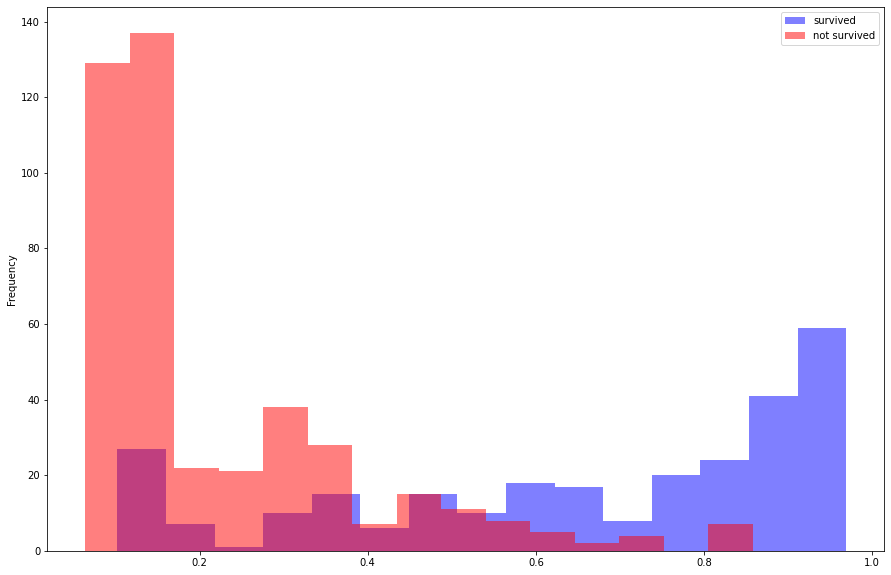

In [217]:
# Histograma

scores = pd.DataFrame({'true':y_train, 'score': y_pred_proba_train})
fig,axes = plt.subplots(1,1, figsize=(15,10))
scores.query('true==1')['score'].plot(kind='hist', bins=15, color='blue', ax=axes, alpha=0.5, label='survived')
scores.query('true==0')['score'].plot(kind='hist', bins=15, color='red', ax=axes, alpha= 0.5, label ='not survived')
plt.legend()

In [ ]:
# classifier = XGBClassifier()

# Cross Validation

In [320]:
# Usando cross val score
results = cross_val_score(classifier, X_train, y_train, scoring='roc_auc',  cv=10)
print(results)

print('media:{}'.format(results.mean()))

[0.87581169 0.81412338 0.85774411 0.78367003 0.93189369 0.84302326
 0.92940199 0.82890365 0.8583887  0.84136213]
media:0.8564322628276118


In [220]:
classifier

GradientBoostingClassifier(max_depth=5, min_samples_leaf=0.05, random_state=42)

In [317]:
# Usando cross validation

logloss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

results = cross_validate(estimator = classifier,
                         X=X_train,
                         y=y_train, 
                         cv=10, 
                         scoring={'roc_auc':'roc_auc','acuracia':'accuracy','log_loss':logloss}, 
                         return_train_score=True)

pd.DataFrame(results)

,fit_time,score_time,test_roc_auc,train_roc_auc,test_acuracia,train_acuracia,test_log_loss,train_log_loss
0,0.016968,0.005984,0.875812,0.861810,0.805556,0.817187,-0.444540,-0.439543
1,0.013120,0.004986,0.814123,0.868026,0.805556,0.812500,-0.495154,-0.433359
2,0.013774,0.004987,0.857744,0.862519,0.816901,0.804992,-0.460140,-0.437199
3,0.014264,0.006020,0.783670,0.870773,0.774648,0.820593,-0.508018,-0.430240
4,0.015005,0.005023,0.931894,0.856077,0.901408,0.801872,-0.350921,-0.450281
5,0.014470,0.005023,0.843023,0.866394,0.760563,0.812793,-0.466078,-0.435503
6,0.013582,0.005024,0.929402,0.856742,0.859155,0.808112,-0.381853,-0.447478
7,0.013356,0.006021,0.828904,0.866624,0.746479,0.814353,-0.508009,-0.431440
8,0.015210,0.005018,0.858389,0.862875,0.816901,0.808112,-0.437302,-0.440019
9,0.013179,0.005023,0.841362,0.864501,0.788732,0.820593,-0.470663,-0.436171


In [318]:
pd.DataFrame(results).agg(['mean','max', 'min']).T.sort_index()

,mean,max,min
fit_time,0.014293,0.016968,0.013120
score_time,0.005311,0.006021,0.004986
test_acuracia,0.807590,0.901408,0.746479
test_log_loss,-0.452268,-0.350921,-0.508018
test_roc_auc,0.856432,0.931894,0.783670
train_acuracia,0.812111,0.820593,0.801872
train_log_loss,-0.438123,-0.430240,-0.450281
train_roc_auc,0.863634,0.870773,0.856077


# Regressors

In [ ]:
def regression_metrics(y_true, y_pred):
    
    metrics={}
    metrics['explained_variance']=explained_variance_score(y_true, y_pred)
    metrics['mslogerror']=mean_squared_log_error(y_true, y_pred)
    metrics['mae']=mean_absolute_error(y_true, y_pred) 
    metrics['mse']=mean_squared_error(y_true, y_pred)
    metrics['rmse'] = np.sqrt(metrics['mse'])
    metrics['median_abs_error']=median_absolute_error(y_true, y_pred)
    metrics['r2']=r2_score(y_true, y_pred)
    return metrics

In [ ]:
regressor = LinearRegression()

# fit_intercept:bool, default=True == se considerado termo de bias
# normalize:bool, default=False == usado somente caso fit_intercept é nulo
# n_jobs:int, default=None
# positive:bool, default=False == força os coeficientes serem positivos



In [ ]:
regressor = SVR()

# C:float, default=1.0 == parametro de regularização (inverso)
# kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ == tipo de kernel
# degree:int, default=3 == grau da função polinimonial do kernel
# gamma:{‘scale’, ‘auto’} or float, default=’scale’ == somente em 'rbf', 'poly' ou 'sigmoid'
# coef0:float, default=0.0 == termo independe do kernel - somente em 'poly' ou 'sigmoid'
# probability:bool, default=False == se verdadeiro, utiliza Platt scaling = que é aplicar uma regressão logística no score do svm
# tol:float, default=1e-3 == tolerancia (criterio de parada)
# class_weight:dict or ‘balanced’, default=None == peso das classes
# decision_function_shape:{‘ovo’, ‘ovr’}, default=’ovr’ == usado em multiclasse para estrategia ovo ou ovr
# break_ties:bool, default=False
# random_state:int, RandomState instance or None, default=None

In [ ]:
regressor =  DecisionTreeRegressor()

# criterion: {“gini”, “entropy”}, default=”gini” == critério de split
# splitter: {“best”, “random”}, default=”best” == estratégia de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# random_state:int, RandomState instance or None, default=None
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer splitt
# class_weight:dict, list of dict or “balanced”, default=None == peso das classes
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning

In [ ]:
regressor = RandomForestRegressor()

# n_estimators: int, default=100 == número de árvores
# criterion: {“gini”, “entropy”}, default=”gini” == critério de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer splitt
# random_state:int, RandomState instance or None, default=None
# bootstrap:bool, default=True == se usa técnica de boostrap
# oob_score: bool, default=False == score out of bag (daí pode obter os score oob pelo atributo oob_score_)
# class_weight:dict, list of dict or “balanced”, default=None == peso das classes
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning
# max_samples:int or float, default=None == se uso bootstrap, qual o tamanho do dataset criado por reposição. Se float pega o percentual

In [ ]:
regressor = GradientBoostingRegressor()

# loss{‘deviance’, ‘exponential’}, default=’deviance’ == função de custo, expontential usa os odds - como em regressão logística
# learning_rate: float, default=0.1 == multiplicador do output de cada árvore
# n_estimators: int, default=100 == número de árvores
# subsample:float, default=1.0 == não são todos os registros que são usados nos fitt dos estimadores - aumenta viés
# criterion{‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’== critério de split
# max_depth: int, default=None == máxima profundidade da árvore
# min_samples_split: int or float, default=2 == minima qtde. de samples para split de nó interno (inteiro ou percentual)
# min_samples_leaf: int or float, default=1 == minima qtde. de samples nos nó pós split (esquerda/direita) (inteiro/percentual)
# min_weight_fraction_leaf: float, default=0.0 == **revisar
# max_features: int,float or {“auto”, “sqrt”, “log2”}, default=None == máximo número de features avaliados para split (combate overfitting)
# max_leaf_nodes:int, default=None == número máximo de folhas
# min_impurity_decrease:float, default=0.0 == quantidade mínima da redução de impureza
# min_impurity_split:float, default=0 == mínima impureza para que seja possível fazer split
# init: estimator or ‘zero’, default=None == computa a predição original
# random_state:int, RandomState instance or None, default=None
# bootstrap:bool, default=True == se usa técnica de boostrap
# validation_fraction: float, default=0.1 ******
# class_weight:dict, list of dict or “balanced”, default=None == peso das classes
# ccp_alpha: non-negative float, default=0.0 == parâmetro de cost complexity prunning
# max_samples:int or float, default=None == se uso bootstrap, qual o tamanho do dataset criado por reposição. Se float pega o percentual



# Clustering

In [232]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=10)

In [233]:
def plot_2d_clustering(X,y,centroid=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    if centroid is not None:
        for centroid in centroid:
            plt.scatter(centroid[0], centroid[1], marker='^', c='black', s=80, alpha=0.5)

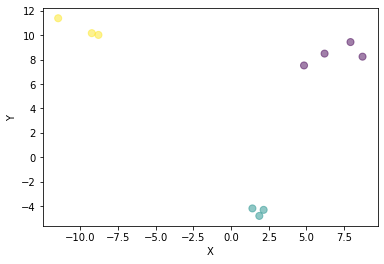

In [234]:
plot_2d_clustering(X,y)

In [ ]:
centrois = np.array([[0,100],[0,1], [1,0]])

clustering = KMeans(n_clusters=3,
                    verbose=3, 
#                     init='random',
                    max_iter=3,
                    init = centrois,
                    random_state=42)

# n_clusters:int, default=8 == numero de clusters/centróides
# init:{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’ == inicialização
# n_init:int, default=10 == numero de vezes de que o kmeans vai ser rodado com diferentes centróides
# max_iter:int, default=300 == número máximo de iterações
# tol:float, default=1e-4 == critério de parada - pela inercia - para declarar convergência
# precompute_distances:{‘auto’, True, False}, default=’auto’ == se computar a distância inicalmente (rapido mas usa memoria)
# verbose:int, default=0
# random_state:int, RandomState instance or None, default=None
# copy_x:bool, default=True
# n_jobs:int, default=None
# algorithm:{“auto”, “full”, “elkan”}, default=”auto”

clustering.fit(X)

print('Centroides:{}'.format(clustering.cluster_centers_))
print('Inertia:{}'.format(clustering.inertia_))
print('Iterações:{}'.format(clustering.n_iter_))

y_pred = clustering.labels_

plot_2d_clustering(X,y_pred,centroid=clustering.cluster_centers_)

In [236]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    return linkage_matrix

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

clustering = AgglomerativeClustering(n_clusters=5, affinity='l1', linkage='complete',distance_threshold=0)

# n_clusters:int or None, default=2 == número de clusters, pode ser não definida se definirmos a distance_thershold
# affinity:str or callable, default=’euclidean’; metrica usada para computar o linkage. Pode ser “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”
# memory:str or object with the joblib.Memory interface, default=None == 
# connectivity:array-like or callable, default=None == 
# compute_full_tree: ‘auto’ or bool, default=’auto’ == 
# linkage:{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’ == critério de linkage
# distance_threshold:float, default=None == distância máxima de que cluster são agrupados
# compute_distances:bool, default=False 

clustering.fit(X)

In [291]:
# clustering = AgglomerativeClustering(n_clusters=None,linkage='single',distance_threshold=0)
# plt.figure(figsize=(30,10))
# linkag_matrix = plot_dendrogram(clustering, truncate_mode='level', p=4)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")

# plt.figure(figsize=(30,10))
# dendongram = sch.dendrogram(sch.linkage(X, method='single'), p=4)
# plt.axhline(y=euc_dis(points[3],points[8]), color='r', linestyle='-')
# plt.tight_layout()

In [ ]:
clustering =  DBSCAN(eps =0.7, min_samples=4,metric='minkowski', p=2)

# eps:float, default=0.5 == epsilon - define o raio de busca
# min_samples:int, default=5 == minPoints para ser considerado core
# metric:string, or callable, default=’euclidean’ == metrica de distancia - exemplo: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
# metric_params:dict, default=None == argumento complementar a distancia
# algorithm:{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ == maneira de partionar espaço
# leaf_size:int, default=30 == tamanho da folha se utilizado ‘ball_tree’ ou ‘kd_tree’
# p:float, default=None == se minkowski, qual a métrica de distancia
# n_jobs:int, default=None == numero de jobs em paralelo para o processamento

clustering.fit(X)

print('Número de Clusters:',len(np.unique(clustering.labels_))-1)

# indeces dos pontos core ou coordenada dos mesmos
clustering.core_sample_indices_
clustering.components_

# label dos pontos
y_pred = clustering.labels_

# Plotta o resultado
plot_2d_clustering(X,y_pred)

In [ ]:
clustering = GaussianMixture(n_components=3,n_init=2,verbose=3)

# n_components:int, default=1 == número de clusters
# covariance_type:{‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’ == tipo de covariância
# tol:float, default=1e-3 == threshold de convergência
# max_iter:int, default=100 == número de iterações do EM
# n_init:int, default=1 == número de inicializações
# init_params:{‘kmeans’, ‘random’}, default=’kmeans’ == inicialização, podendos er kmeans ou outro
# random_state:int, RandomState instance or None, default=None
# verbose:int, default=0

clustering.fit(X)

# compontent pi de cada mistura
clustering.weights_

# "centroide" - media de cada componente
clustering.means_

# Covariâncias (matriz covariância de cada mistura)
clustering.covariances_

# Proba de softclustering
y_pred = clustering.predict_proba(X)

In [ ]:
for mixture in range(y_pred.shape[1]):
    plot_2d_clustering(X,y_pred[:,mixture],list([clustering.means_[mixture]]))
    plt.show()